In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils
import hpe
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import numpy as np
import os
from torch.utils.data import Dataset
import torch
from PIL import Image
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
import albumentations as A
import torch.nn as nn
from torch.optim import Adam
from tqdm import tqdm
from glob import glob
import segmentation_models_pytorch as smp
import torch.nn.functional as F
import cv2
import time 
device =torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
# img_path = "/home/nipun/Pictures/my_eye.png"
# img_path = "/home/nipun/Pictures/Webcam/laptop_eye.jpg"
img_path = "/home/nipun/Pictures/Webcam/normal_eye.jpg"

# img_path = "/home/nipun/Pictures/Webcam/closed_eye.jpg"
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/BioID-FaceDatabase-V1.2/images/BioID_0063.pgm"
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/UBRIS/val_img/C8_S1_I12.tiff"
# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/004_09.png"

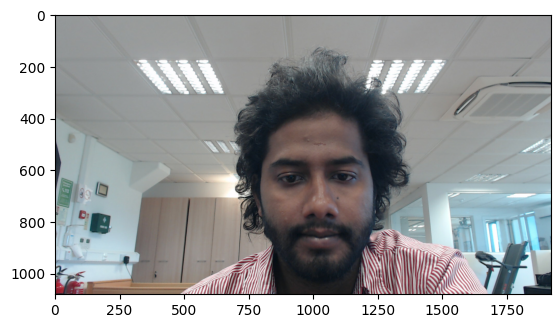

In [3]:
img  = cv2.imread(img_path)

base_img = img.copy()
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img[:,:,::-1])

In [4]:
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((shape.num_parts, 2), dtype=dtype) #( 68,2)

	# loop over all facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, shape.num_parts):
		coords[i] = (shape.part(i).x, shape.part(i).y) # [0,0]--> (x,y)

	# return the list of (x, y)-coordinates
	return coords

In [5]:
def rect_to_bb(rect):
    # we will take the bounding box predicted by dlib library
    # and convert it into (x, y, w, h) where x, y are coordinates
    # and w, h are width and height

    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    
    return (x, y, w, h) 


In [6]:
def captureFaceLandmarks(image):

    # Face Bounding Box
    rects = detector(image, 1)[0]  # --> (x,y,w,h)

    x, y, w, h = rect_to_bb(rects)

    if w * h > 2000:

        shape = predictor(image, rects)
        shape_arr = shape_to_np(shape)

    return shape_arr

In [7]:
shape_arr = captureFaceLandmarks(img)


shape_arr.shape

(68, 2)

In [8]:
rects = detector(img,1)[0] # DliB Rectangles

print(rects)

[(726, 480) (1281, 1035)]


In [9]:
x,y,w,h = rect_to_bb(rects)
print(x,y,w,h)


726 480 555 555


In [10]:
print(f"Width * Height:- {w *h}")

if w * h > 2000:
    shape = predictor(img,rects)
    shape_arr = shape_to_np(shape) 

Width * Height:- 308025


In [11]:
def drawCircleOnEyes(lanmarks_arr,eye):
    
    for (x,y) in lanmarks_arr[eye["left"]:eye["right"]]:
            cv2.circle(img,(x,y),1,(0,0,255),-1)
            

In [12]:
# Right Eye Coordinate

left_eye = {"left":36,"right":42}
right_eye = {"left":42,"right":48}




drawCircleOnEyes(shape_arr,right_eye)
drawCircleOnEyes(shape_arr,left_eye)
    
# shape_arr[36:42]

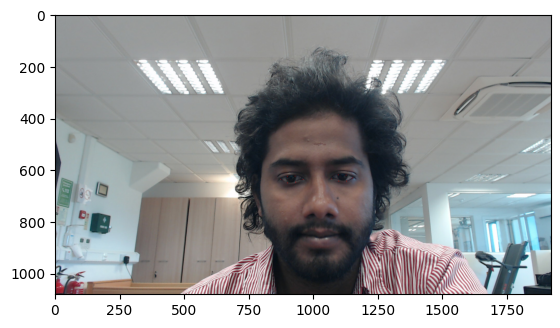

In [13]:
plt.imshow(img[:,:,::-1])

In [14]:
# cv2.circle(img,(int(symmAxis_x),5),1,(0,255,0),-1)

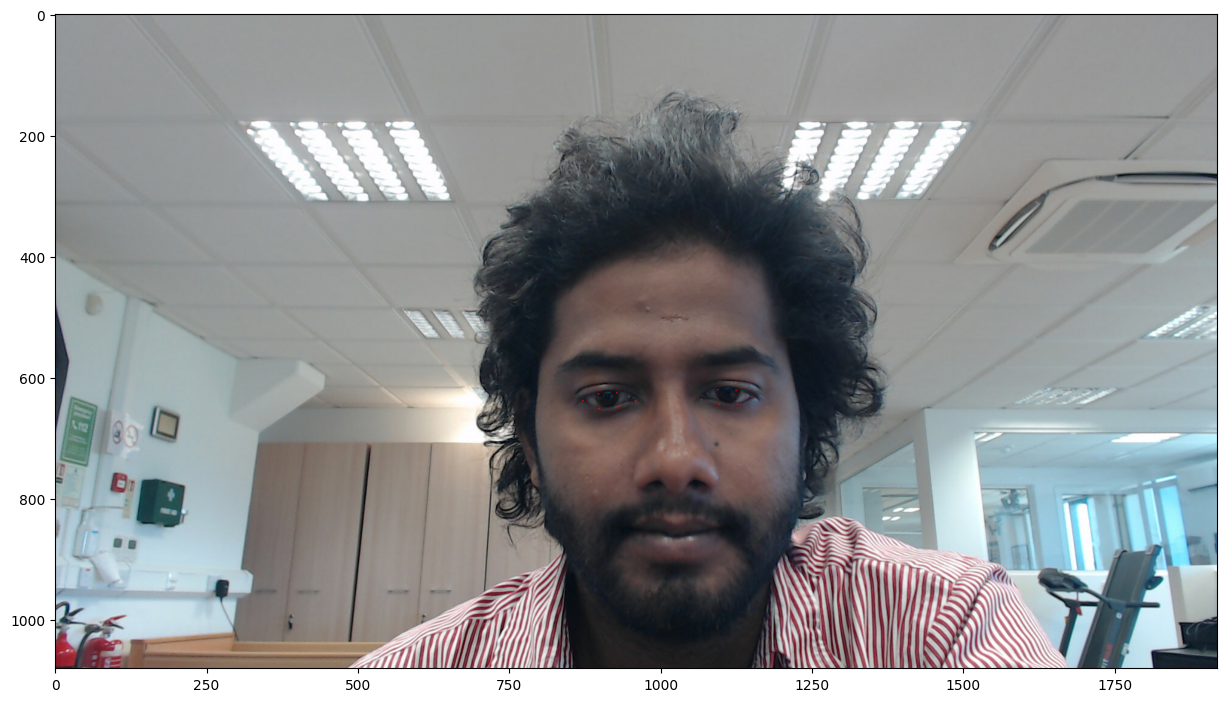

In [15]:
plt.figure(figsize=(15,15))
plt.imshow(img[:,:,::-1])

In [16]:
# MeanWidth  --> No17-No 1
# cv2.circle(img,(shape_arr[0][0],shape_arr[0][1]),1,(0,255,0),-1)
# cv2.circle(img,(shape_arr[16][0],shape_arr[16][1]),1,(0,255,0),-1)

meanWidtch = shape_arr[16][0] - shape_arr[0][0]




In [17]:

def findSymX(shape_arr):
    x_coord = []
    
    for (x,y) in shape_arr[27:31]:
    
        # cv2.circle(img,(x,y),1,(0,255,0),-1)
        # cv2.circle(img,(x,y),1,(0,255,0),-1)
        x_coord.append(x) 
    

    
     # cv2.circle(img,(shape_arr[33][0],shape_arr[33][1]),1,(0,255,0),-1)
    # cv2.circle(img,(shape_arr[51][0],shape_arr[51][1]),1,(0,255,0),-1)
    # cv2.circle(img,(shape_arr[62][0],shape_arr[62][1]),1,(0,255,0),-1)
    # cv2.circle(img,(shape_arr[66][0],shape_arr[66][1]),1,(0,255,0),-1)
    # cv2.circle(img,(shape_arr[57][0],shape_arr[57][1]),1,(0,255,0),-1)
    # cv2.circle(img,(shape_arr[8][0],shape_arr[8][1]),1,(0,255,0),-1) 

    x_coord.append(shape_arr[33][0])
    x_coord.append(shape_arr[51][0])
    x_coord.append(shape_arr[62][0])
    x_coord.append(shape_arr[66][0])
    x_coord.append(shape_arr[57][0])
    x_coord.append(shape_arr[8][0])
    
    
    # print(x_coord)
    
    return sum(x_coord)/len(x_coord)
    
    
    

symmAxis_x  = findSymX(shape_arr)
print(symmAxis_x)


1024.2


In [18]:
# Piyot Y
# cv2.circle(img,(shape_arr[33][0],shape_arr[33][1]),1,(0,255,0),-1)

piyot_y = shape_arr[33][1]

In [19]:
#Left Eye
# cv2.rectangle(img,(shape_arr[18][0],shape_arr[18][1]),(shape_arr[28][0],shape_arr[28][1]),(255,0,0),2)

#Right Eye 

# cv2.rectangle(img,(shape_arr[28][0],shape_arr[25][1]),(shape_arr[25][0],shape_arr[28][1]),(255,0,0),2)




Leye = {"top_left":shape_arr[18],"bottom_right":shape_arr[28]}

Reye = {"top_left":[shape_arr[28][0],shape_arr[25][1]],"bottom_right":[shape_arr[25][0],shape_arr[28][1]]}


left_eye = img[Leye["top_left"][1]:Leye["bottom_right"][1]+20,Leye["top_left"][0]:Leye["bottom_right"][0]-20]

right_eye = img[Reye["top_left"][1]:Reye["bottom_right"][1]+20,Reye["top_left"][0]+20:Reye["bottom_right"][0]]



l_h,l_w,_ = left_eye.shape

print(left_eye.shape)
print(right_eye.shape)

(112, 152, 3)
(123, 128, 3)


In [20]:
resize_amt = 256

In [21]:
# Prediction 

left_eye_image = cv2.cvtColor(left_eye,cv2.COLOR_BGR2RGB)
right_eye_image = cv2.cvtColor(right_eye,cv2.COLOR_BGR2RGB)
print(right_eye_image.shape)

resize_left_image = cv2.resize(left_eye_image ,(resize_amt,resize_amt))



(123, 128, 3)


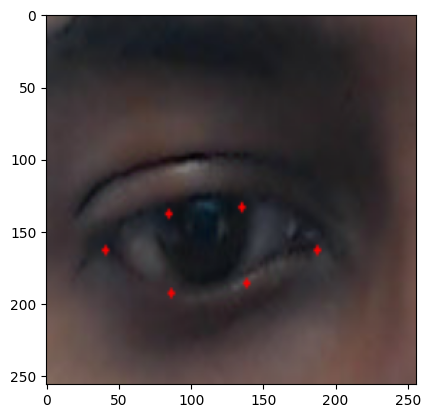

In [22]:
plt.imshow(resize_left_image,cmap="gray")

In [23]:
print(left_eye_image.shape)

(112, 152, 3)


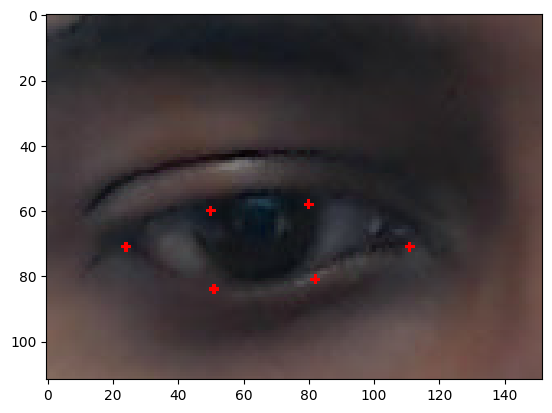

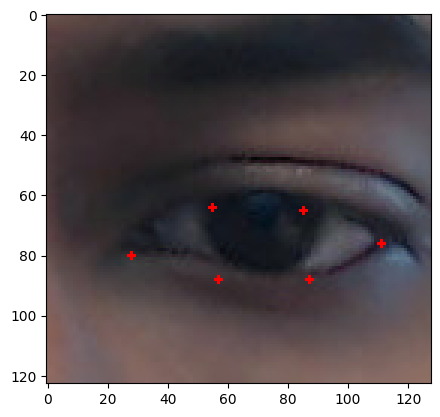

In [24]:
plt.imshow(left_eye_image)
plt.show()
plt.imshow(right_eye_image)
plt.show()

In [25]:
#
transform = A.Compose([
    A.Resize(resize_amt,resize_amt),
    A.augmentations.transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2()
])

aug_r = transform(image=right_eye_image)

aug_l = transform(image=left_eye_image)

l_img = aug_l["image"]
r_img = aug_r["image"]


In [26]:
def predict_image_mask(model,image):
    
    
    image = image.to(device)
    model.eval()
    
    # print(f"Original Image shape: {image.size()}")
    
    # print(f"Ground Truth Mask shape: {mask.size()}")
    
    with torch.no_grad():
        
        softmax = nn.Softmax(dim=1)
        image = image.unsqueeze(0)
        # mask = mask.unsqueeze(0)
        
        model_output,_,_,_,_,_,_ = model(image)
        
        
        output = softmax(model_output)
    
        
        masked = torch.argmax(output,dim=1)
        masked = masked.cpu().squeeze(0)
    return masked


In [27]:

eye_segmentation_path = "/home/nipun/Documents/Uni_Malta/LuminEye/LuminEye-Experiments/U2net/U2NET_MULTICLASS_IMG_256_DIC_batch_8/Miche_model_2023_04_11_22:14:26_val_iou0.900.pt" 
    
    
model = torch.load(eye_segmentation_path,map_location=device)


In [28]:
print(type(model))

<class 'custom_model.U2NET'>


In [29]:
pred_mask_l = predict_image_mask(model,l_img)

pred_mask_r = predict_image_mask(model,r_img)

/home/nipun/.local/lib/python3.10/site-packages/torch/nn/functional.py:3722: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


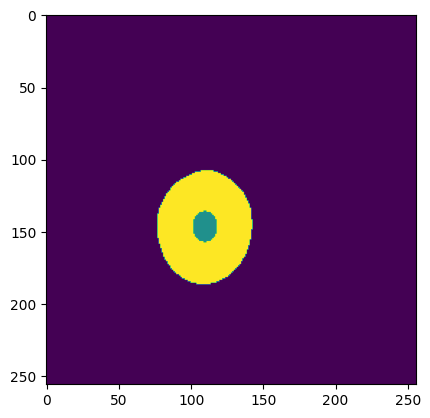

In [30]:
plt.imshow(pred_mask_l)

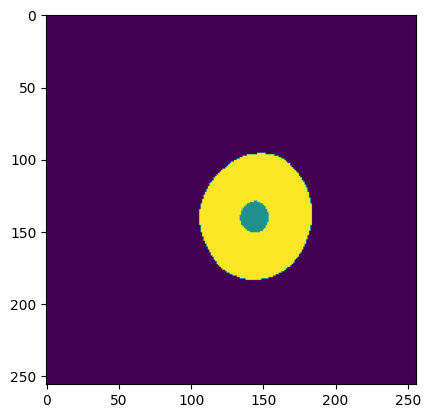

In [31]:
plt.imshow(pred_mask_r)

In [32]:
n_classes = 3
batch_size = 1

colors = [ [  0,   0,   0],[0,255,0],[0,0,255]]
label_colours = dict(zip(range(n_classes), colors))

valid_classes = [0,85, 170]
class_names = ["Background","Pupil","Iris"]
class_map = dict(zip(valid_classes, range(len(valid_classes))))



def decode_segmap(temp):
    #convert gray scale to color
    temp=temp.numpy()
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for l in range(0, n_classes):
        r[temp == l] = label_colours[l][0]
        g[temp == l] = label_colours[l][1]
        b[temp == l] = label_colours[l][2]

    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:, :, 0] = r / 255.0
    rgb[:, :, 1] = g / 255.0
    rgb[:, :, 2] = b / 255.0
    return rgb

In [33]:
# median = cv2.medianBlur(gray, 5)
        
pred_image = decode_segmap(pred_mask_l) * 255

pred_image = pred_image.astype(np.uint8)
# print()

# print(pred_image.shape)
edge_detected_image = cv2.Canny(pred_image, 0, 200)

In [34]:
contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        

In [35]:
max_area = {}

bg_mask = np.ones((512,512))
for contour in contours:
    
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    # print(area)
    if ((len(approx) > 8) & (len(approx) < 23) & (area > 30) ):
        
        
        max_area[area] = contour
        

x = sorted(max_area,key = lambda x:x)


max_contour = max_area[x[-1]]
min_contour = max_area[x[1]]
# cv2.drawContours(bg_mask,[max_contour],0,(0,0,255),-1)

In [36]:
for coords in min_contour:
    # print(coords[0][0])
    
    coords[0][0] = Leye["top_left"][0] + ((coords[0][0]/resize_amt) * l_w)
    coords[0][1] = Leye["top_left"][1] + ((coords[0][1]/resize_amt) * l_h)
    
    

In [37]:
for coords in max_contour:
    # print(coords[0][0])
    
    coords[0][0] = Leye["top_left"][0] + ((coords[0][0]/resize_amt) * l_w)
    coords[0][1] = Leye["top_left"][1] + ((coords[0][1]/resize_amt) * l_h)
    

In [38]:
cv2.drawContours(base_img,[max_contour],0,(0,0,255),1)

array([[[155, 152, 148],
        [156, 153, 150],
        [156, 154, 150],
        ...,
        [150, 148, 147],
        [150, 148, 147],
        [151, 149, 148]],

       [[155, 152, 148],
        [156, 153, 149],
        [156, 154, 150],
        ...,
        [150, 148, 148],
        [150, 148, 148],
        [151, 149, 148]],

       [[155, 152, 148],
        [155, 153, 149],
        [155, 153, 149],
        ...,
        [151, 149, 148],
        [150, 149, 148],
        [151, 149, 148]],

       ...,

       [[ 44,  34,  88],
        [ 43,  34,  90],
        [ 41,  32,  92],
        ...,
        [ 39,  31,  18],
        [ 38,  32,  18],
        [ 37,  31,  17]],

       [[ 43,  37,  58],
        [ 42,  36,  59],
        [ 42,  33,  62],
        ...,
        [ 40,  32,  19],
        [ 38,  32,  18],
        [ 37,  31,  17]],

       [[ 44,  38,  54],
        [ 44,  36,  55],
        [ 45,  33,  59],
        ...,
        [ 41,  34,  21],
        [ 39,  33,  19],
        [ 37,  31,  18]]

In [39]:
cv2.drawContours(base_img,[min_contour],0,(0,255,0),1)

array([[[155, 152, 148],
        [156, 153, 150],
        [156, 154, 150],
        ...,
        [150, 148, 147],
        [150, 148, 147],
        [151, 149, 148]],

       [[155, 152, 148],
        [156, 153, 149],
        [156, 154, 150],
        ...,
        [150, 148, 148],
        [150, 148, 148],
        [151, 149, 148]],

       [[155, 152, 148],
        [155, 153, 149],
        [155, 153, 149],
        ...,
        [151, 149, 148],
        [150, 149, 148],
        [151, 149, 148]],

       ...,

       [[ 44,  34,  88],
        [ 43,  34,  90],
        [ 41,  32,  92],
        ...,
        [ 39,  31,  18],
        [ 38,  32,  18],
        [ 37,  31,  17]],

       [[ 43,  37,  58],
        [ 42,  36,  59],
        [ 42,  33,  62],
        ...,
        [ 40,  32,  19],
        [ 38,  32,  18],
        [ 37,  31,  17]],

       [[ 44,  38,  54],
        [ 44,  36,  55],
        [ 45,  33,  59],
        ...,
        [ 41,  34,  21],
        [ 39,  33,  19],
        [ 37,  31,  18]]

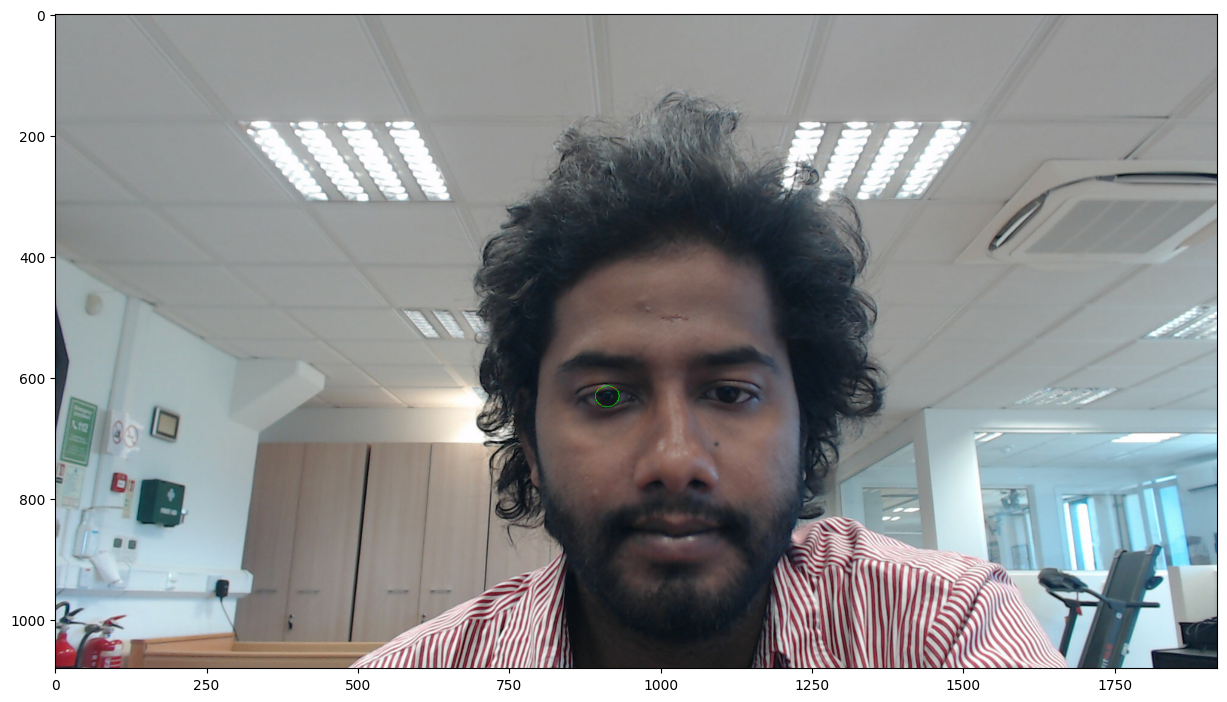

In [40]:
plt.figure(figsize=(15,15))
plt.imshow(base_img[:,:,::-1])

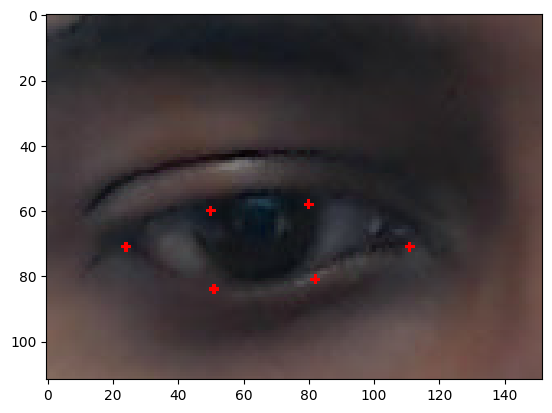

In [41]:
plt.imshow(left_eye[:,:,::-1])

(512, 512)


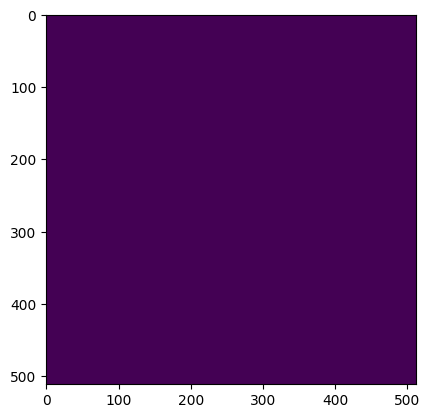

In [42]:
plt.imshow(bg_mask)
print(bg_mask.shape)

In [43]:


cnt = max(contours, key = cv2.contourArea) # finding contour with #maximum area
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])


# print(cx,cy)

In [44]:
ori_h,ori_w,_ =left_eye.shape

In [45]:
ori_cx = int(Leye["top_left"][0] +((cx/resize_amt) * ori_w))
ori_cy = int(Leye["top_left"][1] + ((cy/resize_amt) * ori_h))

print(f"Rescaled CX AND CY Coordinate {ori_cx,ori_cy}")



cv2.circle(base_img,(ori_cx,ori_cy),1,(0,0,255),-1)


Rescaled CX AND CY Coordinate (1387, 842)


array([[[155, 152, 148],
        [156, 153, 150],
        [156, 154, 150],
        ...,
        [150, 148, 147],
        [150, 148, 147],
        [151, 149, 148]],

       [[155, 152, 148],
        [156, 153, 149],
        [156, 154, 150],
        ...,
        [150, 148, 148],
        [150, 148, 148],
        [151, 149, 148]],

       [[155, 152, 148],
        [155, 153, 149],
        [155, 153, 149],
        ...,
        [151, 149, 148],
        [150, 149, 148],
        [151, 149, 148]],

       ...,

       [[ 44,  34,  88],
        [ 43,  34,  90],
        [ 41,  32,  92],
        ...,
        [ 39,  31,  18],
        [ 38,  32,  18],
        [ 37,  31,  17]],

       [[ 43,  37,  58],
        [ 42,  36,  59],
        [ 42,  33,  62],
        ...,
        [ 40,  32,  19],
        [ 38,  32,  18],
        [ 37,  31,  17]],

       [[ 44,  38,  54],
        [ 44,  36,  55],
        [ 45,  33,  59],
        ...,
        [ 41,  34,  21],
        [ 39,  33,  19],
        [ 37,  31,  18]]

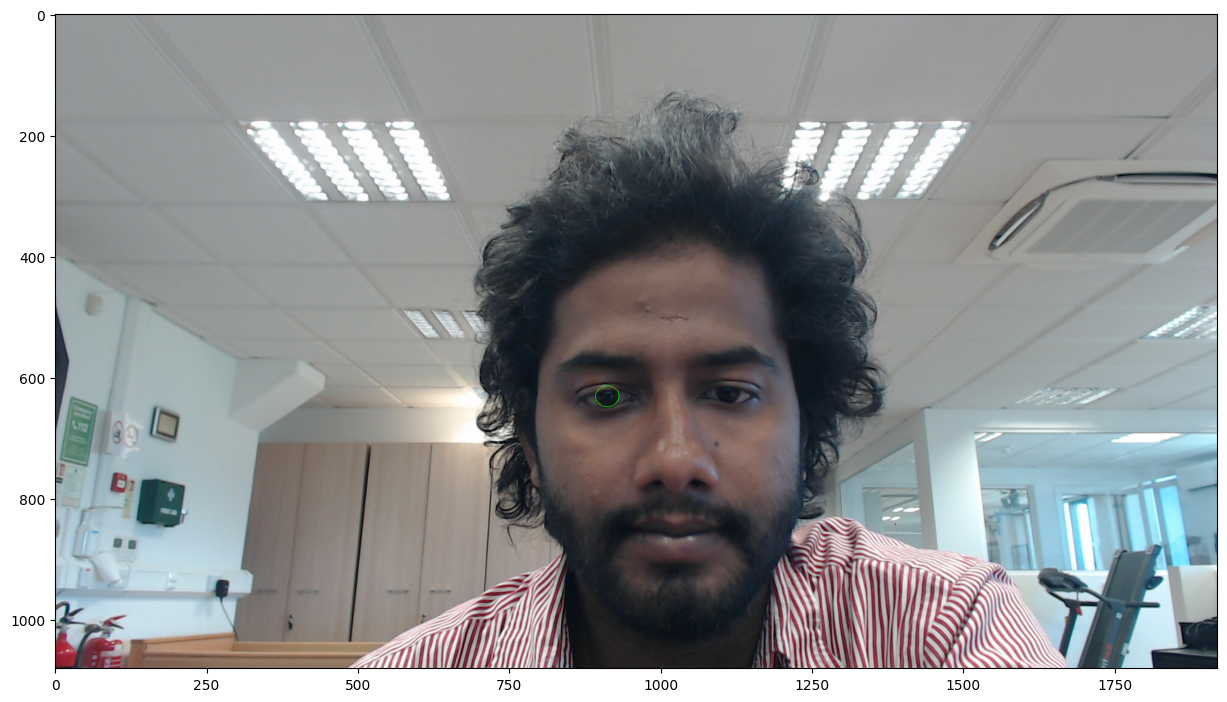

In [46]:
plt.figure(figsize=(15,15))
plt.imshow(base_img[:,:,::-1])

(256, 256, 3)


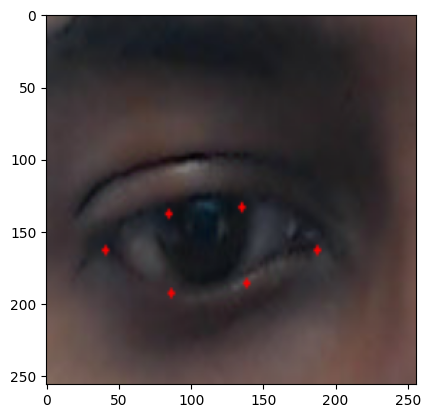

In [47]:
plt.imshow(resize_left_image)

print(resize_left_image.shape)

In [48]:
def findMinEyeX(cntour):
    minVal = cnt[0][0][0]
    for i in cntour:
        if i[0][0] < minVal:
            minVal = i[0][0]
            
    return minVal
        
minValOfIris = findMinEyeX(cnt)


# print(minValOfIris)

minValOfIris = Leye["top_left"][0] +((minValOfIris/resize_amt) * ori_w)

radius_of_iris = ori_cx-minValOfIris

print(radius_of_iris)


# radius_of_iris = (radius_of_iris/resize_amt) * ori_w

10.375


In [49]:
cv2.line(base_img, (ori_cx,ori_cy), (int(ori_cx+radius_of_iris),ori_cy), (0,255,0),2)

array([[[155, 152, 148],
        [156, 153, 150],
        [156, 154, 150],
        ...,
        [150, 148, 147],
        [150, 148, 147],
        [151, 149, 148]],

       [[155, 152, 148],
        [156, 153, 149],
        [156, 154, 150],
        ...,
        [150, 148, 148],
        [150, 148, 148],
        [151, 149, 148]],

       [[155, 152, 148],
        [155, 153, 149],
        [155, 153, 149],
        ...,
        [151, 149, 148],
        [150, 149, 148],
        [151, 149, 148]],

       ...,

       [[ 44,  34,  88],
        [ 43,  34,  90],
        [ 41,  32,  92],
        ...,
        [ 39,  31,  18],
        [ 38,  32,  18],
        [ 37,  31,  17]],

       [[ 43,  37,  58],
        [ 42,  36,  59],
        [ 42,  33,  62],
        ...,
        [ 40,  32,  19],
        [ 38,  32,  18],
        [ 37,  31,  17]],

       [[ 44,  38,  54],
        [ 44,  36,  55],
        [ 45,  33,  59],
        ...,
        [ 41,  34,  21],
        [ 39,  33,  19],
        [ 37,  31,  18]]

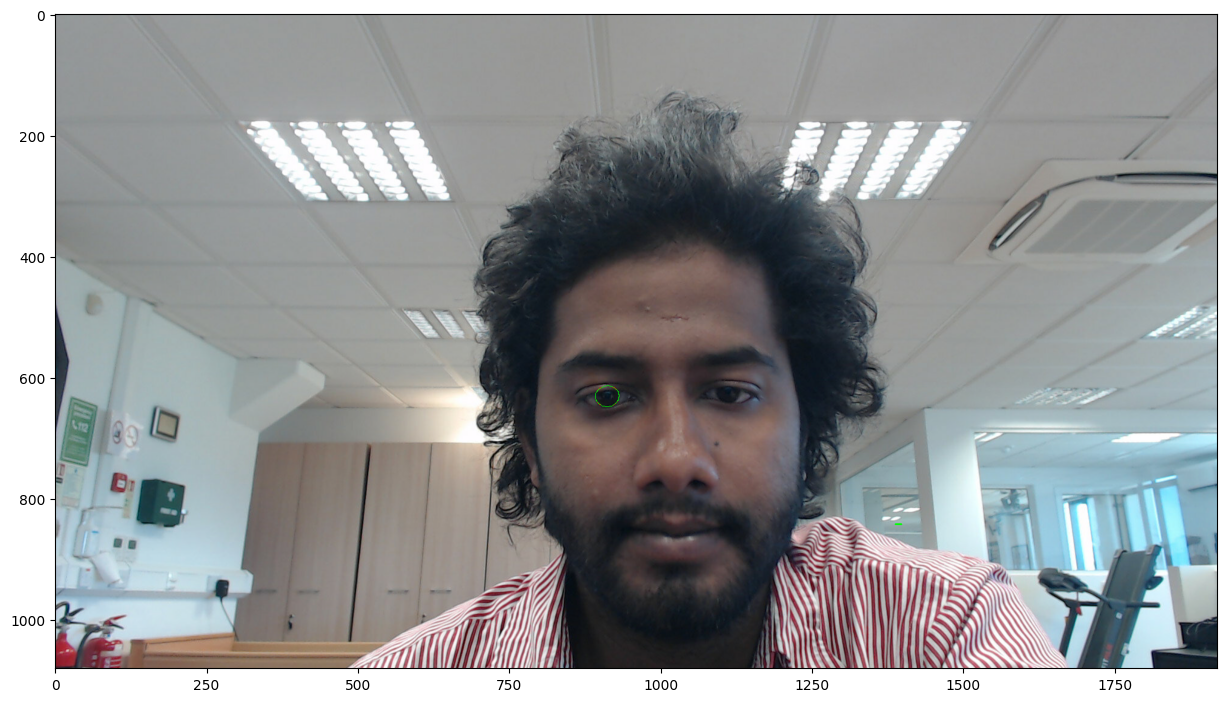

In [50]:
plt.figure(figsize=(15,15))
plt.imshow(base_img[:,:,::-1])

In [51]:
# EyeBall Radius
eyeBallRadius = (12.2/5.9) * radius_of_iris

print(eyeBallRadius)

21.453389830508474


In [52]:
def findRadiusIris(pred_mask,eye_w,eye_h,margin):
    
    pred_image = decode_segmap(pred_mask) * 255
    pred_image = pred_image.astype(np.uint8)
    edge_detected_image = cv2.Canny(pred_image, 0, 200)
    
    contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    
    
    
    cnt = max(contours, key = cv2.contourArea) # finding contour with #maximum area
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    
    ori_cx = int(margin["top_left"][0] +((cx/resize_amt ) * eye_w))
    ori_cy = int(margin["top_left"][1] + ((cy/resize_amt ) * eye_h))
    
    
    
    minValOfIris = findMinEyeX(cnt)
    
    
    minValOfIris = margin["top_left"][0] +((minValOfIris/resize_amt ) * eye_w)
    
    
    
    radius_of_iris = ori_cx-minValOfIris
    
    
    return radius_of_iris,ori_cx,ori_cy

In [53]:
radius_of_iris,ori_cx,ori_cy = findRadiusIris(pred_mask_l,left_eye.shape[1],left_eye.shape[0],Leye)


print(ori_cx)
print(ori_cy)

911
630


In [54]:
print(radius_of_iris)

18.875


In [55]:
# Left Ey

iris_x = cx
iris_y = cy


innerEyeCorner_x,innerEyeCorner_y = shape_arr[39][0],shape_arr[39][1]

outerEyeCorner_x,outerEyeCorner_y = shape_arr[36][0],shape_arr[36][1]


In [56]:
import hpe

In [57]:


r = hpe.compute_rotation(shape_arr)
print(f"Rotation Matrix {r}")

Rotation Matrix [[-1.06364441e-01 -9.94327213e-01  1.21267965e-18]
 [-9.94327213e-01  1.06364441e-01  1.50518853e-16]
 [-1.49793977e-16  1.48040533e-17 -1.00000000e+00]]


In [58]:
yaw, pitch, roll, yaw_deg, pitch_deg, roll_deg = hpe.compute_angles(
        r, 10)

print(yaw)
print(pitch)
print(roll)
print(yaw_deg)
print(pitch_deg)
print(roll_deg)


theta = yaw
phi = pitch

[ 1.00000000e+00 -9.71445147e-17  2.81221894e-33] [-9.71445147e-17  1.00000000e+00  4.05338107e-32] [-2.81221894e-33 -4.05338107e-32  1.00000000e+00] 

[[ 1.00000000e+00 -9.71445147e-17 -2.81221894e-33]
 [-9.71445147e-17  1.00000000e+00 -4.05338107e-32]
 [ 2.81221894e-33  4.05338107e-32  1.00000000e+00]] 

2.8122189376237144e-33
-4.053381066643898e-32
0.0
1.6112827619260296e-31
-2.322416278769312e-30
0.0


In [59]:
# Compute the rotated inner eye corner x-coordinate, for each eye
def cornerX(innerEyeCorner_x, symmAxis_x, R, theta):
    
    # Calculate the eye corner position with respect to the symmetry axis of the face
    x = innerEyeCorner_x - symmAxis_x
    
    # Calculate the angle between the eye corner and the symmetry axis of the face
    wc = math.asin(x / R)
    
    # Calculate the new image position of the eye corner after rotating by the head yaw angle
    innerEyeCornerRot_x = R * math.sin(wc + math.radians(theta))
    
    return innerEyeCornerRot_x


# Compute the rotated inner eye corner y-coordinate, for each eye
def cornerY(innerEyeCorner_y, pivot_y, phi):
    
    # Calculate the eye corner position with respect to a pivot point
    y = innerEyeCorner_y - pivot_y
    
    # Calculate the new image position of the eye corner after rotating by the head pitch angle
    innerEyeCornerRot_y = y * math.cos(math.radians(phi))
    
    return innerEyeCornerRot_y

In [60]:
# Compute the rotated iris centre x-coordinate, for each eye
def irisX(innerEyeCorner_x, outerEyeCorner_x, symmAxis_x, r, R, iris_x, theta):
    
    # Calculate the centre point of the eyeball with respect to the symmetry axis of the face
    eyeMid_x = ((innerEyeCorner_x + outerEyeCorner_x) / 2) - symmAxis_x
    eyeMid_y = r - R
    
    # Calculate the radius, Re
    Re = math.sqrt(eyeMid_x ** 2 + eyeMid_y ** 2)
    
    # Calculate the angle, omega_h
    wh = math.asin(eyeMid_x / Re)
    
    
    print(iris_x)
    print(symmAxis_x)
    
    print(eyeMid_x)
    
    print(r)
    # Calculate the angle, omega_e
    we = math.asin(((iris_x - symmAxis_x) - eyeMid_x) / r)
    
    # Calculate the new centre point of the eyeball with respect to the symmetry axis of the
    # face, after a head rotation by the yaw angle, theta
    eyeMidRot_x = Re * math.sin(wh + math.radians(theta))
    
    # Calculate the new image position of the iris centre after rotating by the head yaw angle
    irisRot_x = (r * math.sin(we + math.radians(theta))) + eyeMidRot_x

    return irisRot_x


# Compute the rotated iris centre y-coordinate, for each eye
def irisY(innerEyeCorner_y, outerEyeCorner_y, pivot_y, r, iris_y, phi):
    
    # Calculate the centre point of the eyeball with respect to a pivot point
    eyeMid_y = ((innerEyeCorner_y + outerEyeCorner_y) / 2) - pivot_y
    
    # Calculate the angle between the projection of the point on the eyeball sphere and the
    # eyeball centre
    
   
    we = math.asin((eyeMid_y - (iris_y - pivot_y)) / r)
    
    # Calculate the new image position of the iris centre after rotating by the head pitch angle
    irisRot_y = (eyeMid_y * math.cos(math.radians(phi))) - (r * math.sin(we + math.radians(phi)))
    
    return irisRot_y

In [61]:
import math
R = meanWidtch / 2

innerEyeCornerRot_left_x = cornerX(innerEyeCorner_x=innerEyeCorner_x, symmAxis_x=symmAxis_x, R=R, theta=theta)
innerEyeCornerRot_left_y = cornerY(innerEyeCorner_y=innerEyeCorner_y , pivot_y=piyot_y, phi=phi)

# print(innerEyeCornerRot_left_x,innerEyeCornerRot_left_y )


irisRot_left_x = irisX(innerEyeCorner_x=innerEyeCorner_x, outerEyeCorner_x=outerEyeCorner_x, symmAxis_x=symmAxis_x, r=radius_of_iris, R=R, iris_x=ori_cx, theta=theta)
irisRot_left_y = irisY(innerEyeCorner_y=innerEyeCorner_y, outerEyeCorner_y=outerEyeCorner_y, pivot_y=piyot_y, r=radius_of_iris, iris_y=ori_cy, phi=phi)
    


print(irisRot_left_x)
print(irisRot_left_y)

911
1024.2
-109.70000000000005
18.875
-113.20000000000005
-162.0


In [74]:
# math.asin(((178 - 512) - -36) / 142)
math.radians(0)

# (178-512 +36 )/142

0.0

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils
import hpe
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import numpy as np
import os
from torch.utils.data import Dataset
import torch
from PIL import Image
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
import albumentations as A
import torch.nn as nn
from torch.optim import Adam
from tqdm import tqdm
from glob import glob
import segmentation_models_pytorch as smp
import torch.nn.functional as F
import cv2
import time
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


N = 15  # Initial Number of Frames

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
model = torch.load(
    "/home/nipun/Documents/Uni_Malta/LuminEye/LuminEye-Experiments/U2net/u2net_multiclass_epoch_200_batch_2/Miche_model_2023_01_09_23:22:49_val_iou0.907.pt")

n_classes = 3
batch_size = 1

colors = [[0,   0,   0], [0, 255, 0], [0, 0, 255]]
label_colours = dict(zip(range(n_classes), colors))

valid_classes = [0, 85, 170]
class_names = ["Background", "Pupil", "Iris"]


class_map = dict(zip(valid_classes, range(len(valid_classes))))
n_classes = len(valid_classes)


def decode_segmap(temp):
    # convert gray scale to color
    temp = temp.numpy()
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for l in range(0, n_classes):
        r[temp == l] = label_colours[l][0]
        g[temp == l] = label_colours[l][1]
        b[temp == l] = label_colours[l][2]

    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:, :, 0] = r / 255.0
    rgb[:, :, 1] = g / 255.0
    rgb[:, :, 2] = b / 255.0
    return rgb


def find_contours(image):
    pred_image = decode_segmap(image) * 255

    pred_image = pred_image.astype(np.uint8)

    edge_detected_image = cv2.Canny(pred_image, 0, 200)

    contours, hierarchy = cv2.findContours(
        edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # finding contour with #maximum area
    cnt = max(contours, key=cv2.contourArea)
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    return cx, cy


def rect_to_bb(rect):
    # we will take the bounding box predicted by dlib library
    # and convert it into (x, y, w, h) where x, y are coordinates
    # and w, h are width and height
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)


def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((shape.num_parts, 2), dtype=dtype)  # ( 68,2)

    # loop over all facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, shape.num_parts):
        coords[i] = (shape.part(i).x, shape.part(i).y)  # [0,0]--> (x,y)

    # return the list of (x, y)-coordinates
    return coords


def findSymX(shape_arr):
    x_coord = []

    for (x, y) in shape_arr[27:31]:

        x_coord.append(x)

    x_coord.append(shape_arr[33][0])
    x_coord.append(shape_arr[51][0])
    x_coord.append(shape_arr[62][0])
    x_coord.append(shape_arr[66][0])
    x_coord.append(shape_arr[57][0])
    x_coord.append(shape_arr[8][0])

    return sum(x_coord)/len(x_coord)





def transformData(right_eye_image, left_eye_image, resize_amt):

    transform = A.Compose([
        A.Resize(resize_amt, resize_amt),
        A.augmentations.transforms.Normalize(
            mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
        ToTensorV2()
    ])

    aug_r = transform(image=right_eye_image)

    aug_l = transform(image=left_eye_image)

    l_img = aug_l["image"]
    r_img = aug_r["image"]

    return l_img, r_img


def predict_image_mask(model, image):
    model.eval()

    image = image.to(device)

    with torch.no_grad():

        softmax = nn.Softmax(dim=1)
        image = image.unsqueeze(0)

        model_output, _, _, _, _, _, _ = model(image)

        output = softmax(model_output)

        masked = torch.argmax(output, dim=1)
        masked = masked.cpu().squeeze(0)
    return masked


def captureFaceLandmarks(image):

    # Face Bounding Box
    rects = detector(image, 1)[0]  # --> (x,y,w,h)

    x, y, w, h = rect_to_bb(rects)

    if w * h > 2000:

        shape = predictor(image, rects)
        shape_arr = shape_to_np(shape)

    return shape_arr


def calculateSpheroParameters(image):

    shape_arr = captureFaceLandmarks(image)

    meanWidtch = shape_arr[16][0] - shape_arr[0][0]

    symmAxis_x = findSymX(shape_arr=shape_arr)

    piyot_y = shape_arr[33][1]

    x1, y1, x2, y2 = prediction(image, shape_arr)

    return x1, y1, x2, y2


def prediction(image, shape_arr):
    Leye = {"top_left": shape_arr[18], "bottom_right": shape_arr[28]}

    Reye = {"top_left": [shape_arr[28][0], shape_arr[25][1]],
            "bottom_right": [shape_arr[25][0], shape_arr[28][1]]}

    left_eye = image[Leye["top_left"][1]:Leye["bottom_right"]
                     [1], Leye["top_left"][0]:Leye["bottom_right"][0]]

    right_eye = image[Reye["top_left"][1]:Reye["bottom_right"]
                      [1], Reye["top_left"][0]:Reye["bottom_right"][0]]

    left_eye_image = cv2.cvtColor(left_eye, cv2.COLOR_BGR2RGB)
    right_eye_image = cv2.cvtColor(right_eye, cv2.COLOR_BGR2RGB)

    l_eye, r_eye = transformData(
        right_eye_image, left_eye_image, resize_amt=512)

    pred_l_eye = predict_image_mask(model, l_eye)
    pred_r_eye = predict_image_mask(model, r_eye)

    l_iris_center_x, l_iris_center_y = find_contours(pred_l_eye)
    r_iris_center_x, r_iris_center_y = find_contours(pred_r_eye)

    return l_iris_center_x, l_iris_center_y, r_iris_center_x, r_iris_center_y

In [2]:
img_path = "/home/nipun/Pictures/my_eye.png"

In [3]:
image = cv2.imread(img_path)

In [4]:
# x1,y1,x2,y2 = calculateSpheroParameters(image)
    
# cv2.circle(image,(x1,y1),1,(0,0,255),-1)
# cv2.circle(image,(x2,y2),1,(0,255,0),-1)

In [5]:
shape_arr = captureFaceLandmarks(image)

meanWidtch = shape_arr[16][0] - shape_arr[0][0]

symmAxis_x = findSymX(shape_arr=shape_arr)

piyot_y = shape_arr[33][1]

In [8]:
Leye = {"top_left": shape_arr[18], "bottom_right": shape_arr[28]}

Reye = {"top_left": [shape_arr[28][0], shape_arr[25][1]],
            "bottom_right": [shape_arr[25][0], shape_arr[28][1]]}

left_eye = image[Leye["top_left"][1]:Leye["bottom_right"]
                     [1], Leye["top_left"][0]:Leye["bottom_right"][0]]

right_eye = image[Reye["top_left"][1]:Reye["bottom_right"]
                      [1], Reye["top_left"][0]:Reye["bottom_right"][0]]

left_eye_image = cv2.cvtColor(left_eye, cv2.COLOR_BGR2RGB)
right_eye_image = cv2.cvtColor(right_eye, cv2.COLOR_BGR2RGB)
l_eye, r_eye = transformData(
    right_eye_image, left_eye_image, resize_amt=512)

pred_l_eye = predict_image_mask(model, l_eye)
pred_r_eye = predict_image_mask(model, r_eye)

In [9]:
print(left_eye_image.shape)
print(right_eye_image.shape)

(83, 141, 3)
(80, 145, 3)


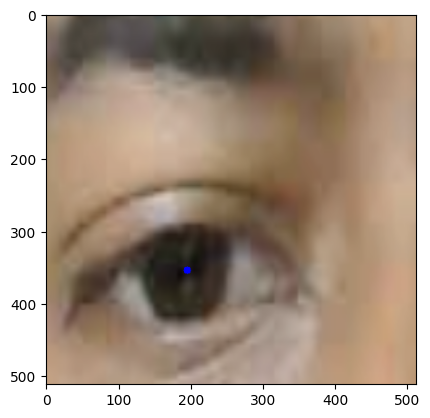

In [75]:

# left_eye_image = cv2.resize(left_eye_image,(512,512))
plt.imshow(left_eye_image)

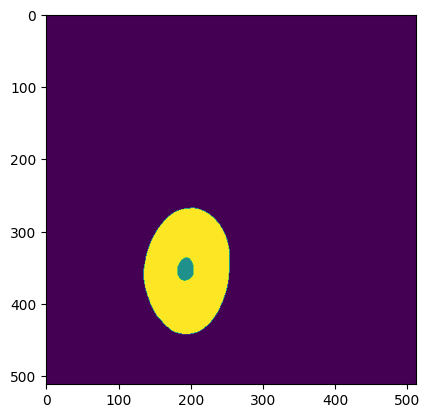

In [57]:
plt.imshow(pred_l_eye)

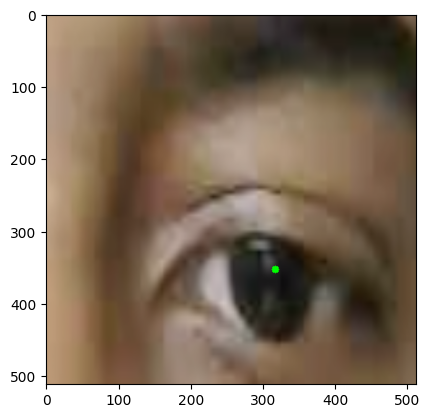

In [79]:
# right_eye_image 

right_eye_image = cv2.resize(right_eye_image,(512,512))

plt.imshow(right_eye_image)

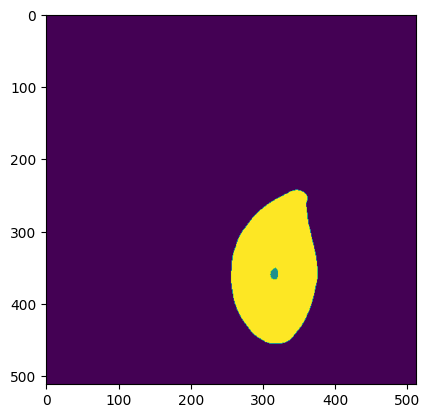

In [58]:
plt.imshow(pred_r_eye)

In [31]:
l_iris_center_x, l_iris_center_y = find_contours(pred_l_eye)
r_iris_center_x, r_iris_center_y = find_contours(pred_r_eye)


# print(l_iris_center_x, l_iris_center_y)



x1 = int((l_iris_center_x/512) * left_eye_image.shape[1]) +  Leye["top_left"][0]

y1 = int((l_iris_center_y/512) * left_eye_image.shape[0]) + Leye["top_left"][1]

print(x1,y1)


520 417


In [28]:
cv2.circle(left_eye_image,(x1, y1),5,(0,255,0),-1)

array([[[169, 148, 124],
        [168, 146, 122],
        [166, 144, 122],
        ...,
        [193, 165, 138],
        [193, 164, 136],
        [192, 164, 135]],

       [[153, 135, 114],
        [152, 134, 114],
        [152, 134, 115],
        ...,
        [192, 164, 136],
        [193, 164, 135],
        [193, 163, 134]],

       [[142, 127, 108],
        [142, 126, 109],
        [142, 126, 110],
        ...,
        [192, 164, 135],
        [192, 163, 134],
        [192, 162, 134]],

       ...,

       [[195, 161, 133],
        [194, 161, 132],
        [193, 160, 132],
        ...,
        [190, 155, 121],
        [188, 154, 120],
        [187, 153, 118]],

       [[195, 161, 133],
        [195, 161, 132],
        [194, 161, 132],
        ...,
        [190, 155, 121],
        [188, 153, 119],
        [186, 151, 117]],

       [[196, 162, 132],
        [196, 161, 131],
        [194, 161, 132],
        ...,
        [191, 155, 121],
        [189, 153, 119],
        [187, 151, 117]]

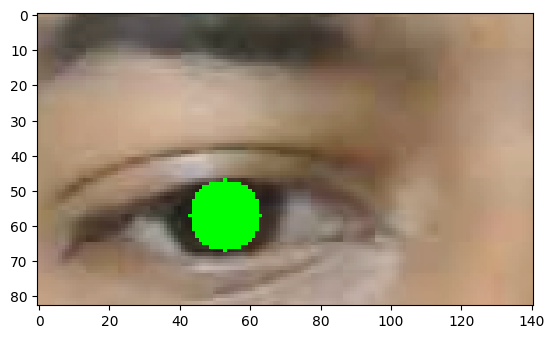

In [30]:
plt.imshow(left_eye_image)

In [78]:
cv2.circle(left_eye_image,(l_iris_center_x, l_iris_center_y),5,(0,0,255),-1)
cv2.circle(right_eye_image,(r_iris_center_x, r_iris_center_y ),5,(0,255,0),-1)

array([[[190, 162, 133],
        [190, 162, 133],
        [190, 162, 133],
        ...,
        [119,  97,  78],
        [119,  97,  78],
        [119,  97,  78]],

       [[190, 162, 133],
        [190, 162, 133],
        [190, 162, 133],
        ...,
        [119,  97,  78],
        [119,  97,  78],
        [119,  97,  78]],

       [[190, 162, 133],
        [190, 162, 133],
        [190, 162, 133],
        ...,
        [119,  97,  78],
        [119,  97,  78],
        [119,  97,  78]],

       ...,

       [[187, 152, 118],
        [187, 152, 118],
        [187, 152, 118],
        ...,
        [128, 106,  81],
        [128, 106,  81],
        [128, 106,  81]],

       [[187, 152, 118],
        [187, 152, 118],
        [187, 152, 118],
        ...,
        [128, 106,  81],
        [128, 106,  81],
        [128, 106,  81]],

       [[187, 152, 118],
        [187, 152, 118],
        [187, 152, 118],
        ...,
        [128, 106,  81],
        [128, 106,  81],
        [128, 106,  81]]

In [32]:
cv2.circle(image,(x1, y1),5,(0,255,0),-1)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [225, 223, 224],
        [225, 223, 224],
        [225, 223, 224]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [225, 223, 224],
        [225, 223, 224],
        [225, 223, 224]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [225, 223, 224],
        [225, 223, 224],
        [225, 223, 224]],

       ...,

       [[ 36,  33,  32],
        [ 36,  33,  32],
        [ 36,  33,  32],
        ...,
        [ 36,  33,  32],
        [ 36,  33,  32],
        [ 36,  33,  32]],

       [[ 36,  33,  32],
        [ 36,  33,  32],
        [ 36,  33,  32],
        ...,
        [ 36,  33,  32],
        [ 36,  33,  32],
        [ 36,  33,  32]],

       [[ 36,  33,  32],
        [ 36,  33,  32],
        [ 36,  33,  32],
        ...,
        [ 36,  33,  32],
        [ 36,  33,  32],
        [ 36,  33,  32]]

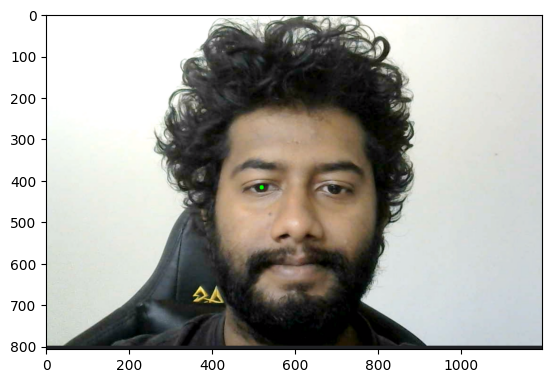

In [33]:
plt.imshow(image[:,:,::-1])

# Eye Blink Detection

In [233]:
import time
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from imutils.video import FileVideoStream, VideoStream
from scipy.spatial import distance as dist

In [245]:
# img_path = "/home/nipun/Pictures/Webcam/closed_eye.jpg"
# img_path = "/home/nipun/Pictures/Webcam/normal_eye.jpg"
# img_path = "/home/nipun/Pictures/Webcam/laptop_eye.jpg"
# img_path = "/home/nipun/Pictures/Webcam/gaze_right_dir.jpg"
# img_path = "/home/nipun/Pictures/Webcam/Long_Distance_Image.jpg"
# img_path = "/home/nipun/Pictures/Webcam/Long_Distance_Eye_Closed.jpg"
img_path = "/home/nipun/Pictures/Webcam/Bigger_Eyes.jpg"



In [246]:
img = cv2.imread(img_path)

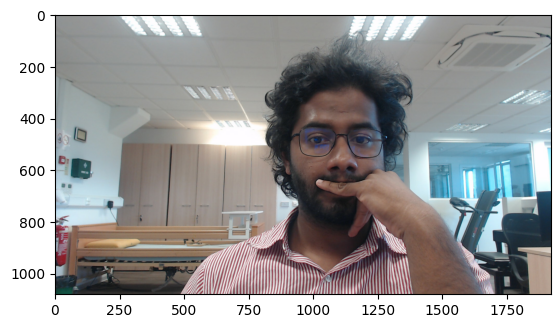

In [247]:
plt.imshow(img[:,:,::-1])

In [248]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [249]:
def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

In [250]:

(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [251]:
shape_arr = captureFaceLandmarks(img)

In [252]:
img  = cv2.imread(img_path)

In [253]:
leftEye = shape_arr[lStart:lEnd]
rightEye = shape_arr[rStart:rEnd]
leftEAR = eye_aspect_ratio(leftEye)
rightEAR = eye_aspect_ratio(rightEye)

In [254]:
ear = (leftEAR + rightEAR) / 2.0

In [255]:
print(ear)

0.2178562886642912
